In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

import time
from IPython.display import clear_output


In [23]:
n = 500  # numero de registros
p = 2  # numero de características
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) 
Y = Y[:, np.newaxis]
# funcionde activación y derivada
sigm = (lambda x: 1 / (1 + np.exp(-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0, x))

topology = [p, 4, 8, 1]

l2_cost = (lambda yp, yr: np.mean((yp - yr) ** 2),
           lambda yp, yr: (yp - yr))

In [24]:
class NeuralLayer:
    def __init__(self, n_conn, n_neuron, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neuron) * 2 - 1  # vector de sesgos (Normalizado -1, 1)
        self.W = np.random.rand(n_conn, n_neuron) * 2 - 1  # matriz de pesos (Normalizado -1, 1)

In [25]:
def create_nn(layer_v, act_f):
    nn = []
    for idx, l in enumerate(layer_v[:-1]):
        nn.append(NeuralLayer(layer_v[idx], layer_v[idx + 1], act_f))

    return nn

In [26]:
def train(nn, X, Y, cost_f, lr=0.5, train=True):
    # Forward pass
    out = [(None, X)]
    for l, layer in enumerate(nn):
        z = out[-1][1] @ nn[l].W + nn[l].b
        a = nn[l].act_f[0](z)

        out.append((z, a))

    if train:
        #Backward pass
        deltas = []

        for l in reversed(range(0, len(nn))):
            z = out[l + 1][0]
            a = out[l + 1][1]
            if l == len(nn) - 1:  # delta última capa
                deltas.insert(0, cost_f[1](a, Y) * nn[l].act_f[1](a))
            else:  # delta respecto capa previa
                deltas.insert(0, deltas[0] @ _W * nn[l].act_f[1](a))

            _W = nn[l].W.T

            # Gradient descend
            nn[l].b = nn[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            nn[l].W = nn[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]

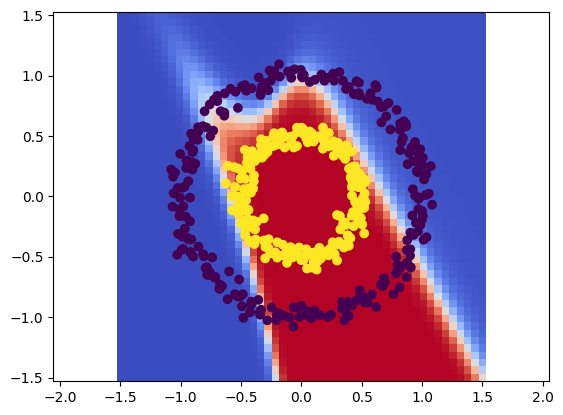

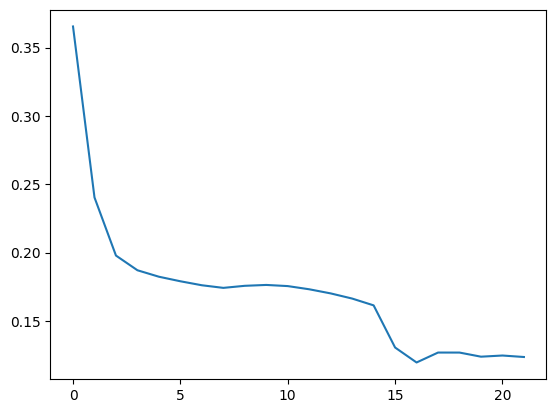

KeyboardInterrupt: 

In [27]:
nn = create_nn(topology, sigm)
loss = []
for i in range(5000):

    py = train(nn, X, Y, l2_cost, lr=0.05)
    if i % 25 == 0:
        loss.append(l2_cost[0](py, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(nn, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')

        plt.scatter(X[:, 0], X[:, 1], c=Y)
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)